# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

n     Energy            log10(ΔE)   log10(Δρ)   Δtime
---   ---------------   ---------   ---------   ------
  1   +30.15899912928                   -1.41    5.25s
  2   +21.64955284444        0.93       -0.82   10.2ms
  3   +17.38426591190        0.63       -0.43   10.0ms
  4   +11.87614726072        0.74       -0.29   10.0ms
  5   +9.860621334524        0.30       -0.52   10.0ms
  6   +9.116848671198       -0.13       -0.86   8.05ms
  7   +8.729875155972       -0.41       -0.92   8.01ms
  8   +8.534793400661       -0.71       -1.01   8.04ms
  9   +8.390697354718       -0.84       -1.07   8.11ms
 10   +8.279838525101       -0.96       -1.12   8.01ms
 11   +8.178293742097       -0.99       -1.06   47.5ms
 12   +8.079319430968       -1.00       -1.06   8.50ms
 13   +8.041182955363       -1.42       -1.05   6.39ms
 14   +8.006445464566       -1.46       -1.11   6.25ms
 15   +7.974506047226       -1.50       -1.12   6.20ms
 16   +7.960655149369       -1.86       -1.06   6.17ms
 17   +7.94

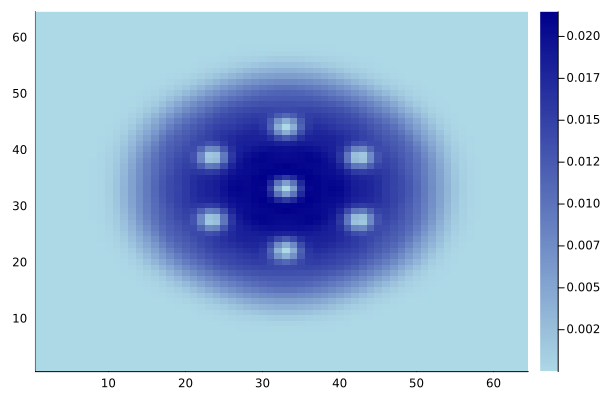

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)